In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


# Skup podataka

In [249]:
#with open('communities data.txt') as f:
#    lines = [line.strip().split(',') for line in f.readlines()]
#f.close()

In [250]:
#with open('col names.txt') as g:
#    col_names = [line.strip().split(' ') for line in g.readlines()]
#g.close()

In [251]:
#col_names=np.array(col_names).flatten()

In [2]:
#data=pd.DataFrame(data=lines,columns=col_names)
data=pd.read_excel('Residential-Building-Data-set.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Columns: 109 entries, START YEAR to V-10
dtypes: float64(94), int64(15)
memory usage: 316.9 KB


In [3]:
data.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [4]:
data.shape

(372, 109)

In [9]:
# Plotting the heatmap of correlation between features
#corr = data.corr()
#plt.figure(figsize=(20,20))
#sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
#plt.show()

In [6]:
X=data.drop(['V-9','V-10'],axis=1)
y=data['V-9']

In [7]:
X.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-20.4,V-21.4,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5


In [8]:
y.head()

0    2200
1    5000
2    1200
3     165
4    5500
Name: V-9, dtype: int64

#  

#  Priprema podataka

-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)<br>
-- county: numeric code for county - not predictive, and many missing values (numeric)<br>
-- community: numeric code for community - not predictive and many missing values (numeric)<br>
-- communityname: community name - not predictive - for information only (string)<br>
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [258]:
#X=X.drop(columns=['county','community','communityname','fold'],axis=1)
#X.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,...,0.29,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14
1,53,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0,0.02,0.12,0.45,0,0,0,0,0,0
2,24,0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0,0.01,0.21,0.02,0,0,0,0,0,0
3,34,0.04,0.77,1,0.08,0.12,0.1,0.51,0.5,0.34,...,0,0.02,0.39,0.28,0,0,0,0,0,0
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0,0.04,0.09,0.02,0,0,0,0,0,0


In [259]:
#X.shape

(1994, 123)

In [260]:
#X['state'].value_counts()

In [10]:
#oe=preprocessing.OrdinalEncoder()
#oe.fit(X)
#X=oe.transform(X)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#  

#  Početni model - logistička regresija

In [14]:
lr=linear_model.LogisticRegression(max_iter=1000) 
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred_lr=lr.predict(X_test)

In [18]:
print(metrics.r2_score(y_test,y_pred_lr))

0.7408863425801289


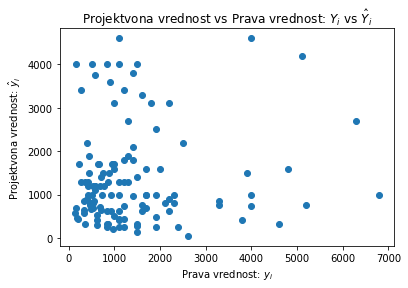

In [58]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel("Prava vrednost: $y_i$")
plt.ylabel("Projektvona vrednost: $\hat{y}_i$")
plt.title("Projektvona vrednost vs Prava vrednost: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [59]:
print('Intercept term: ',lr.intercept_)
print('Coefficients: \n',lr.coef_) 

Intercept term:  [-2.33763718 -1.99786313 -2.29053172 -3.95883639 -0.96970405 -2.50460822
 -5.05636149 -1.5010801  -2.3664749  -1.29086218 -0.87082859 -1.90638807
 -2.8134615  -1.5911884  -4.78022385 -1.14240537 -3.22245456 -1.13126605
  0.1761451  -3.30402258 -0.45258631 -3.23442645  0.47703816  0.98991268
  0.6248822  -1.183291   -0.98012463  1.193976   -0.28493962 -2.07884459
  0.33875747  0.15739551  0.61679638  0.0462219  -0.26637613  0.11527755
 -0.86839206 -0.12716378  1.47038145  1.94204213  0.04836306  1.0287695
  0.92491423 -0.58941555 -2.8551498   1.62696744 -0.01962071 -0.19552464
 -0.6809937   1.63329051  0.6328062   0.60133214 -2.08804145  0.68909694
 -0.35261666  2.23826091  1.33607208  1.40882284 -1.74332682  0.28683756
  1.76390139 -0.05237055  0.43551998  1.27606168 -0.70372559  0.88881739
  0.44738149  0.4155036  -0.00994811  4.16397379  3.85969939  4.64155483
  4.42416616  3.11549746  4.22618365  4.01708791  2.89605217  2.81462159
  3.28539482 -1.95092401  2.2581751

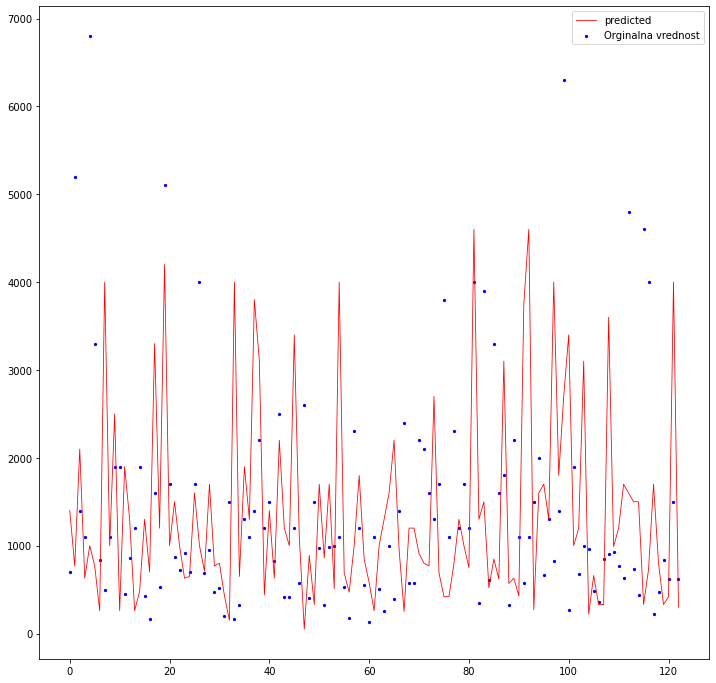

In [60]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_lr, lw=0.8, color="red", label="predicted")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

#  

# Least Angle Regression

In [61]:
lars = linear_model.Lars(eps=1)
lars.fit(X_train,y_train)
lars.coef_

array([ 2.21715536e+00,  2.40041065e-01,  2.36002006e+00, -5.00366638e+00,
       -2.21613262e+01,  2.86711112e+00, -5.95780427e+00,  1.53554883e+01,
       -2.61433138e-01,  6.82777963e+00,  6.06355843e+01,  1.01729442e+03,
        2.86277906e+01, -2.35697687e+00, -6.85009845e-01,  1.03409795e+01,
        1.80342762e+00, -3.55685635e+00, -1.93257471e+00,  9.79619009e+00,
        7.62134473e+00, -4.30068734e+00, -1.29359821e+00, -2.09942370e+00,
        6.84933351e+00, -4.35534567e+00, -5.59544649e-01, -1.12681939e+00,
        3.94163258e+00,  5.90788101e-01,  4.97758385e+00,  1.17606218e+01,
       -3.90384007e+00, -3.18294394e+00,  4.48549196e+00,  2.96516306e+00,
       -1.01992989e+01, -6.67086244e+00,  1.47809488e+01,  2.41206352e+01,
       -1.91596028e+00, -2.28095550e+00, -2.54921461e+00,  8.57574729e+00,
       -5.58466171e+00, -1.91398767e+00, -1.42828668e+00,  6.09747834e+00,
        2.14458519e+00,  1.59173271e+00,  1.18081595e+01, -4.84297749e+00,
       -7.35210681e+00, -

In [33]:
y_pred_train_lars = lars.predict(X_train)
y_pred_test_lars  = lars.predict(X_test)

In [35]:
print('R-square, Training, LARS: ', metrics.r2_score(y_train,y_pred_train_lars)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS: ', metrics.r2_score(y_test,y_pred_test_lars)) #R^2_score LARS na test skupu

R-square, Training, LARS:  0.9792783953265838
R-square, Testing, LARS:  0.9819903846812575


In [36]:
lars.score(X_test,y_test)

0.9819903846812575

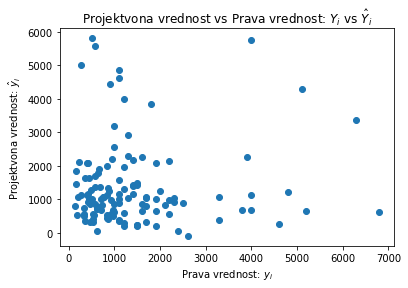

In [62]:
plt.scatter(y_test,y_pred_test_lars)
plt.xlabel("Prava vrednost: $y_i$")
plt.ylabel("Projektvona vrednost: $\hat{y}_i$")
plt.title("Projektvona vrednost vs Prava vrednost: $Y_i$ vs $\hat{Y}_i$")
plt.show()

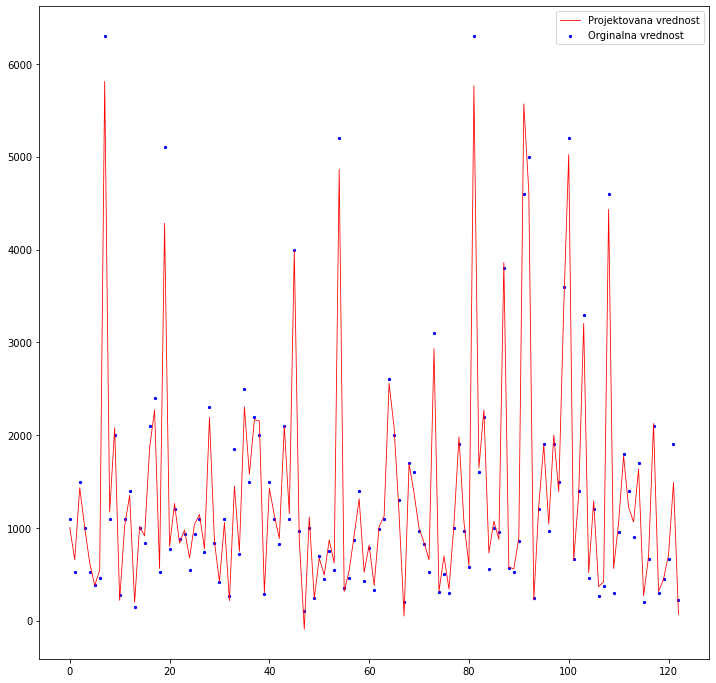

In [37]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test_lars, lw=0.8, color="red", label="Projektovana vrednost")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# Least Angle Regression -Lasso

In [38]:
lars_lasso = linear_model.LassoLars(alpha=0)
lars_lasso.fit(X_train,y_train)
lars_lasso.coef_

array([ 0.00000000e+00,  4.22709395e+02,  0.00000000e+00,  2.37296184e+01,
       -8.00852391e+01,  8.65535173e+01, -1.28242965e+02,  5.21611718e+01,
       -1.77637185e+02,  3.77707370e+01,  9.00034015e+01,  1.12857489e+03,
       -7.87505559e+01,  0.00000000e+00,  0.00000000e+00, -5.30910870e-01,
        0.00000000e+00, -1.00378531e+00,  3.78839557e+02, -1.85206725e+01,
        2.91723697e+01,  6.71369510e+01, -6.26051773e+01, -1.76365636e+02,
        1.52313092e+02, -1.16401246e+02,  0.00000000e+00,  0.00000000e+00,
       -5.01283245e+01,  0.00000000e+00, -1.49627458e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.33581748e+01,  0.00000000e+00,
       -9.44067374e+01, -4.07876619e+02, -1.76664005e+02, -9.22979304e+01,
        1.28741844e+02, -1.42310860e+01,  1.53957843e+02,  2.82736177e+01,
        1.29059628e+02,  9.84654738e+02,  0.00000000e+00,  6.22927640e+01,
        1.33012902e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [39]:
y_pred_train_lars_lasso = lars_lasso.predict(X_train)
y_pred_test_lars_lasso  = lars_lasso.predict(X_test)

In [41]:
print('R-square, Training, LARS: ', metrics.r2_score(y_train,y_pred_train_lars)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS: ', metrics.r2_score(y_test,y_pred_test_lars)) #R^2_score LARS na test skupu
print('R-square, Training, LARS-Lasso: ', metrics.r2_score(y_train,y_pred_train_lars_lasso)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS-Lasso: ', metrics.r2_score(y_test,y_pred_test_lars_lasso)) #R^2_score LARS na test skupu

R-square, Training, LARS:  0.9792783953265838
R-square, Testing, LARS:  0.9819903846812575
R-square, Training, LARS-Lasso:  0.986131113641988
R-square, Testing, LARS-Lasso:  0.9770464664169658


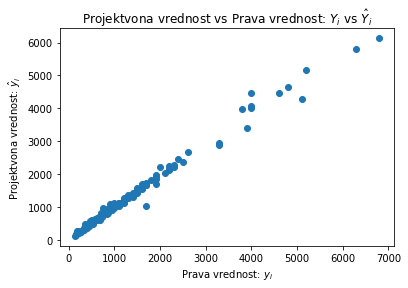

In [63]:
plt.scatter(y_test,y_pred_test_lars_lasso)
plt.xlabel("Prava vrednost: $y_i$")
plt.ylabel("Projektvona vrednost: $\hat{y}_i$")
plt.title("Projektvona vrednost vs Prava vrednost: $Y_i$ vs $\hat{Y}_i$")
plt.show()

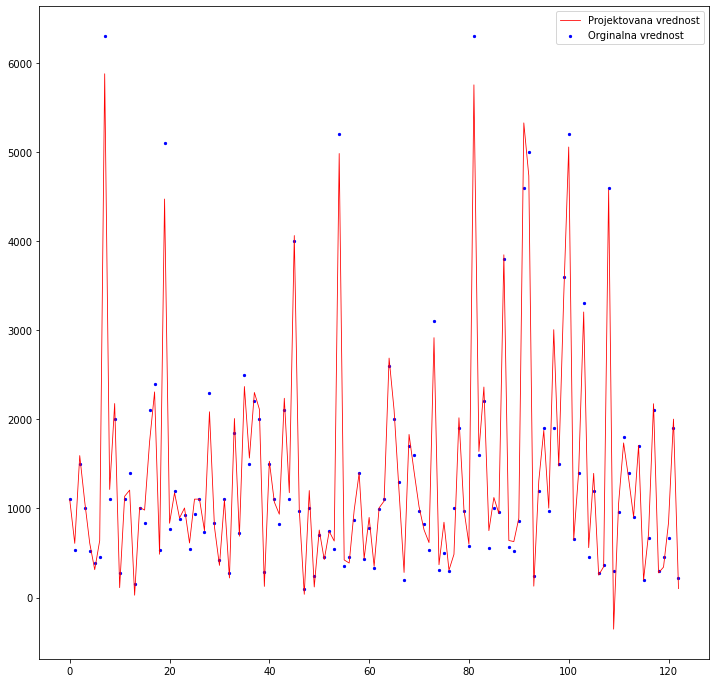

In [42]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test_lars_lasso, lw=0.8, color="red", label="Projektovana vrednost")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

In [44]:
X_train_validation, X_test, y_train_validation, y_test = \
    model_selection.train_test_split(X, y, test_size=0.33, random_state = 7)

In [45]:
X_train, X_validation, y_train, y_validation =\
    model_selection.train_test_split(X_train_validation, y_train_validation, test_size = 0.2, random_state = 7)

In [46]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_train_validation=scaler.transform(X_train_validation)
X_test=scaler.transform(X_test)

In [47]:
Eps = np.array([10**i for i in range(-5, 5)])

best_score_lars = 0 
best_params_lars = {'eps':0}


# za sve kombinacije C i gamma parametara
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lars = linear_model.Lars(eps=eps)
    lars_pipeline = pipeline.make_pipeline(scaler, lars)
    scores = model_selection.cross_val_score(lars_pipeline, X_train_validation, y_train_validation,  cv=10)


    # za skor (ocenu) modela uzimamo prosek dobijenih vrednosti
    score = scores.mean()

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lars: 
        best_score_lars = score
        best_params_lars['eps'] = eps

In [48]:
best_score_lars

0.9723002372705605

In [49]:
best_params_lars

{'eps': 1.0}

In [50]:
Alphas = np.array([10**i for i in range(-5, 5)])

best_score_lasso = 0 
best_params_lasso = {'alpha':0}


# za sve kombinacije C i gamma parametara
for alpha in Alphas:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lars = linear_model.LassoLars(alpha=alpha)
    lars_pipeline = pipeline.make_pipeline(scaler, lars)
    scores = model_selection.cross_val_score(lars_pipeline, X_train_validation, y_train_validation,  cv=10)


    # za skor (ocenu) modela uzimamo prosek dobijenih vrednosti
    score = scores.mean()

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lasso: 
        best_score_lasso = score
        best_params_lasso['alpha'] = alpha

In [51]:
best_score_lasso

0.9742464544300541

In [52]:
best_params_lasso

{'alpha': 0.1}

In [55]:
lars_lasso = linear_model.LassoLars(alpha=best_params_lasso['alpha'])
lars_lasso.fit(X_train,y_train)
y_pred_train_lars_lasso = lars_lasso.predict(X_train)
y_pred_test_lars_lasso  = lars_lasso.predict(X_test)


print('R-square, Training, LARS-Lasso: ', metrics.r2_score(y_train,y_pred_train_lars_lasso)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS-Lasso: ', metrics.r2_score(y_test,y_pred_test_lars_lasso)) #R^2_score LARS na test skupu

R-square, Training, LARS-Lasso:  0.9902591368744866
R-square, Testing, LARS-Lasso:  0.984105176608507


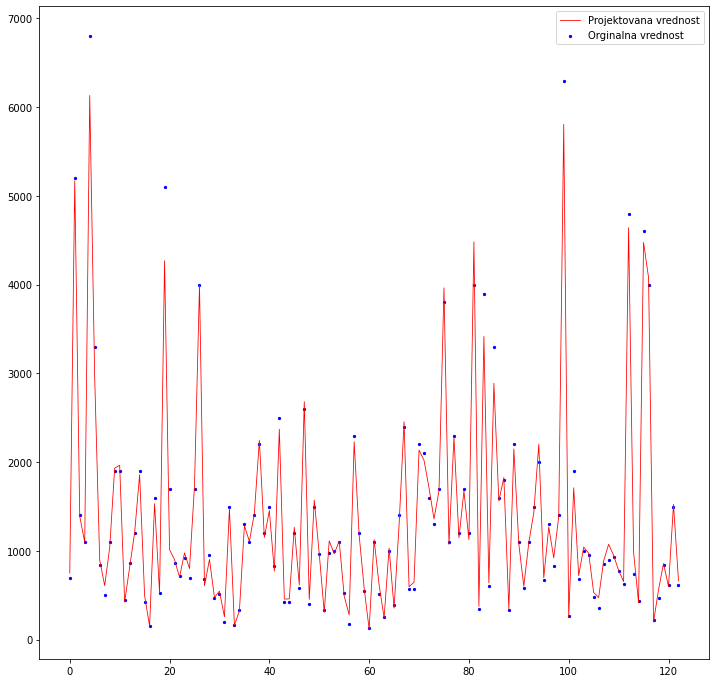

In [56]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test_lars_lasso, lw=0.8, color="red", label="Projektovana vrednost")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()